In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine )

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [79]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_date = str(dt.date(2017,8,23) - dt.timedelta(days=365))
#last_year_date

# Perform a query to retrieve the data and precipitation scores
last_month_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= last_year_date).all()
#last_month_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_df = pd.DataFrame(last_month_data,columns=['Date','precipitation'])

# Removing the rows with NAN values
precp_df.dropna(inplace = True)

# Sort the dataframe by date
precp_df = precp_df.sort_values(['Date'])
precp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data


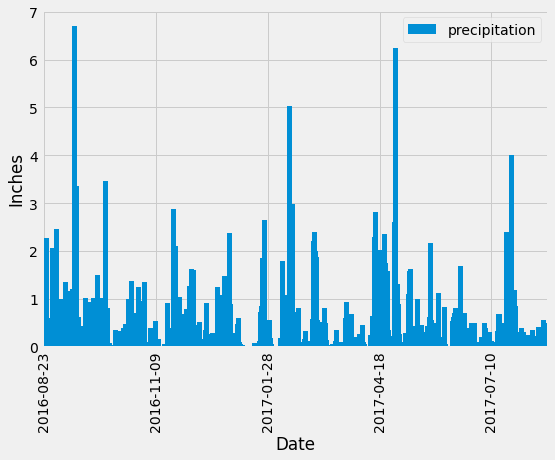

In [191]:
precp_df.plot(kind='bar', figsize = (8,6), width=20,grid = True)
xticks_list = ["2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"]
plt.ylabel("Inches")
plt.xlabel("Date")
plt.tight_layout()
tick_locations = [value for value in range(0,precp_df['Date'].count(),450)]
plt.xticks(tick_locations, xticks_list)
plt.show()

Text(0, 0.5, 'Inches')

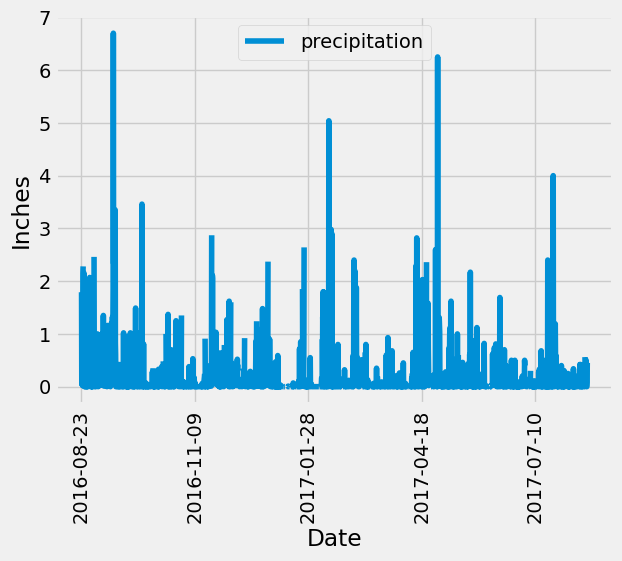

In [10]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# # Starting from the most recent data point in the database. 

# # Calculate the date one year from the last date in data set.
# last_year_date = str(dt.date(2017,8,23) - dt.timedelta(days=365))
# #last_year_date

# # Perform a query to retrieve the data and precipitation scores
# last_month_data = session.query(Measurement.date, Measurement.prcp).\
#                     filter(Measurement.date >= last_year_date).all()
# #last_month_data

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
# precp_df = pd.DataFrame(last_month_data,columns=['Date','precipitation'])

# # Removing the rows with NAN values
# precp_df.dropna(inplace = True)

# # Sort the dataframe by date
# precp_df = precp_df.sort_values(['Date'])
# precp_df.head()

# # Use Pandas Plotting with Matplotlib to plot the data


In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
precp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_cnt = session.query(func.count(Station.station)).all()
station_cnt

[(9,)]

In [100]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Station.station, func.count(Measurement.station)).\
                    filter(Measurement.station==Station.station).\
                    group_by(Station.station).\
                    order_by(desc(func.count(Measurement.station))).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [121]:
# The most active station id
active_stations[0]

'USC00519281'

In [113]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active_station_data = session.query(*sel).\
                            filter(Measurement.station==active_stations[0]).all()
                            

most_active_station_data

[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_month_temp_data = session.query(Measurement.tobs).\
                        filter(Measurement.station==active_stations[0]).\
                        filter(Measurement.date >= last_year_date).all()
                        
# Convert the result to a DataFrame
last_month_temp_data_df = pd.DataFrame(last_month_temp_data)

 # Plot the Histogram
last_month_temp_data_df.plot(kind = 'hist',bins = 12,figsize=(8,6))
plt.xlabel('Temperature')
plt.show()

NameError: name 'session' is not defined

# Close Session

In [16]:
# Close Session
session.close()